In [1]:
import requests
import networkx as nx
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from unidecode import unidecode

In [2]:
hsc_url = "http://prac.im.pwr.wroc.pl/~hugo/HSC/Publications.html"
response = requests.get(hsc_url)
soup = BeautifulSoup(response.content, "html.parser")

In [3]:
def find_HSC_authors(soup):
    HSC_authors = []

    for ol_part in soup.find_all('ol')[2:28]: #in all part from <ol> to </ol>
        li_part = ol_part.find_all('li') #find part from <li> to </li> 
        for li in li_part:
            #print(li.get_text())
            publication = []
            for who in li.find_all('b'):
                publication.append(who.get_text())
                
            HSC_authors.append(publication)
            
    return HSC_authors

def clean_text(txt):
    
    a = txt.split("-")[0] #part before the '-' sign
    a = a.strip()
    a = a.capitalize()
    a = unidecode(a)
    if a == 'A.stanislawsky':
        a = 'A.stanislavsky'
    else:
        pass
    
    return a

def get_publications_number(authors):
    # first step is cleaning text
    for i in range(len(authors)):
        for person in range(len(authors[i])):
            authors[i][person] = clean_text(authors[i][person])
            
    #second is get publications number for each author
    pub_number = {} 
    for i in range(len(authors)):
        for person in range(len(authors[i])):
            who = authors[i][person]

            if who not in pub_number:
                pub_number[who] = 1
            else:
                pub_number[who] = pub_number[who] + 1
                
    return pub_number

def authors_graph(authors):
    HSC_graph = nx.Graph()

    for i in range(len(authors)):
        for person in range(len(authors[i])):

            for partner in range(person+1,len(authors[i])):
                if HSC_graph.has_edge(authors[i][person],authors[i][partner]):

                    w = HSC_graph[authors[i][person]][authors[i][partner]]['weight']
                    w = w + 1
                else:

                    HSC_graph.add_edge(authors[i][person],authors[i][partner],weight = 1)
    return HSC_graph


In [4]:
authors = find_HSC_authors(soup)
pub_number = get_publications_number(authors)    
HSC_graph = authors_graph(authors)

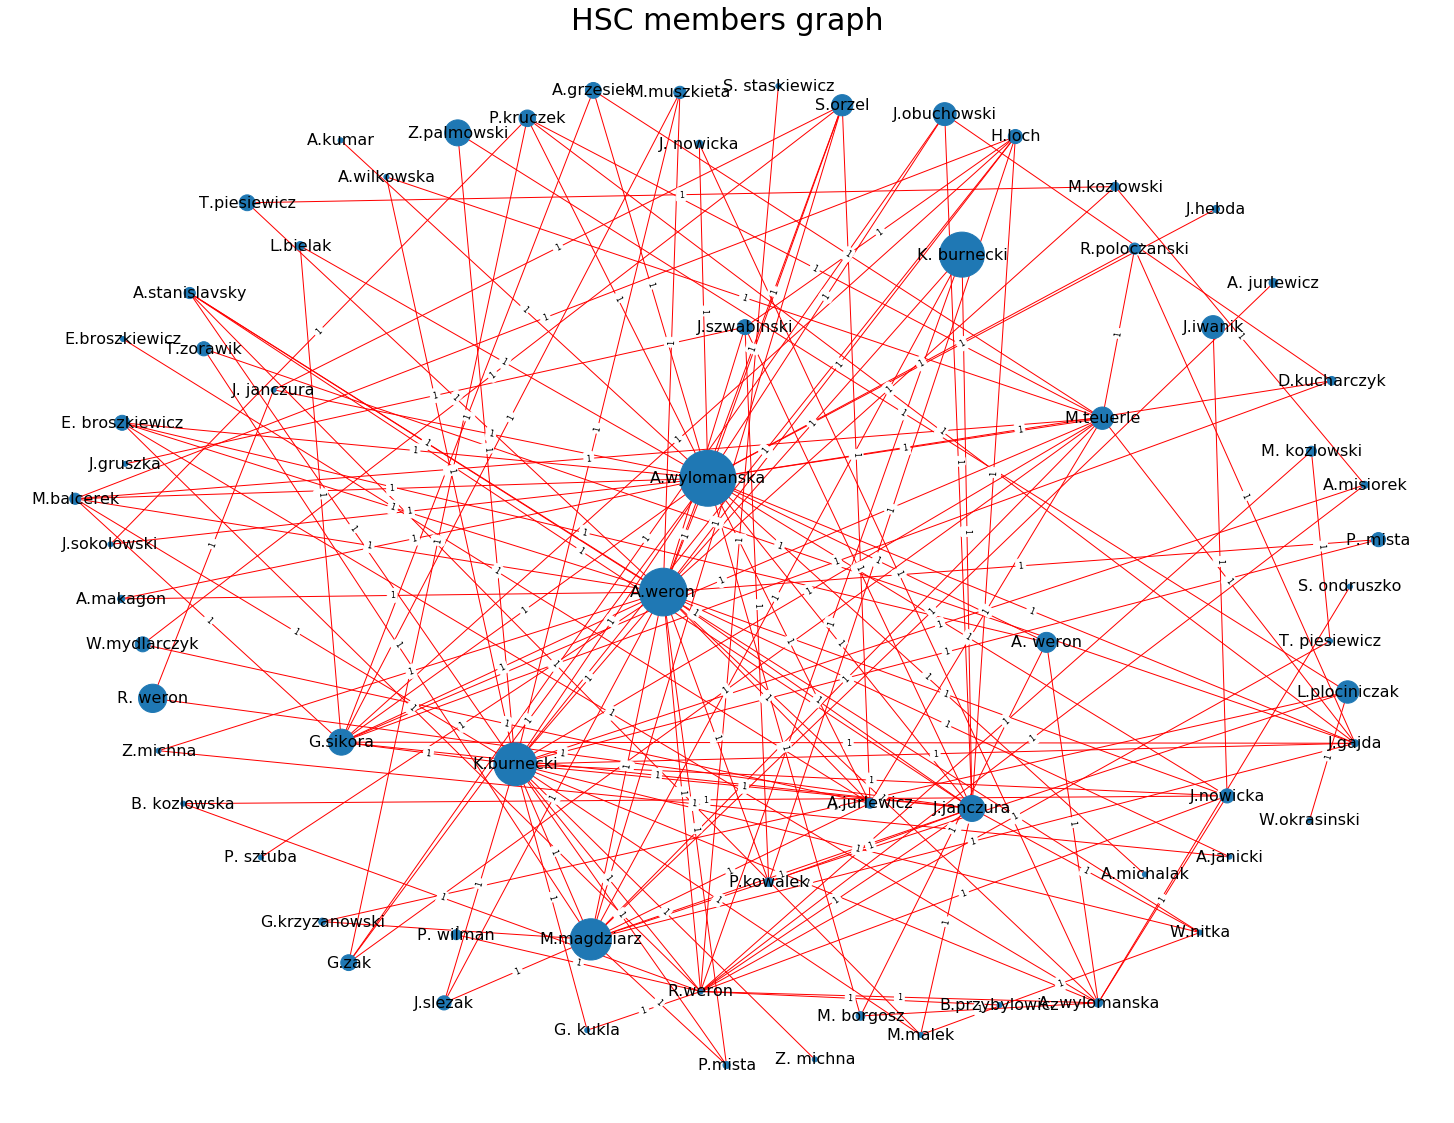

In [8]:
fig = plt.gcf() #figure for the graph
fig.set_size_inches(20,15)

nodes_sizes = [pub_number[person]*25 for person in pub_number] #size of the node depends on papers number

## plot graph
pos = nx.spring_layout(HSC_graph, k =2)
nx.draw(HSC_graph, pos, node_size = nodes_sizes, with_labels = True, font_size=16, edge_color='red')
weights = nx.get_edge_attributes(HSC_graph,'weight')
nx.draw_networkx_edge_labels(HSC_graph, pos, edge_labels = weights, font_size = 8)
plt.title('HSC members graph', fontdict = {'fontsize' : 30})
plt.show()
